In [3]:
import torch
import Utilitaires

class VoxNet_feat(torch.nn.Module):

    def __init__(self, num_classes, input_shape=(32, 32, 32)): 
        super(VoxNet_feat, self).__init__()
        self.conv = torch.nn.Sequential(torch.nn.Conv3d(1,32,5,2),
                                       torch.nn.LeakyReLU(),
                                       torch.nn.Dropout(p=0.2),
                                       torch.nn.Conv3d(32, 32, 3),
                                       torch.nn.LeakyReLU(),
                                       torch.nn.MaxPool3d(2),
                                       torch.nn.Dropout(p=0.3)
                                       
        )
        self.fc1=torch.nn.Linear(32* 6 * 6 * 6, 128)
        self.dense = torch.nn.Sequential(
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.4),
            torch.nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x=x.view(x.size()[0],1,32,32,32)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dense(x)
        return x



In [4]:
import torch
import torch.utils.data
num_classes=10
_,trainset=Utilitaires.txt_to_tensordataset('train2.txt',num_classes)
_,testset=Utilitaires.txt_to_tensordataset('test2.txt',num_classes)

trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True,num_workers=0)
testloader=torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True,num_workers=0)
print(len(testloader.dataset))







0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
6978


In [5]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
cuda=True
net = VoxNet_feat(num_classes=num_classes)
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print("using cuda")
    net.cuda()
learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)
Utilitaires.train(net, optimizer, trainloader, testloader, criterion,  n_epoch = 10,
      train_acc_period = 10,
      test_acc_period = 1000)
Utilitaires.accuracy(net,testloader)

using cuda
[1,    10] loss: 0.054
[1,    10] acc: 0.303
[1,    20] loss: 0.035
[1,    20] acc: 0.579
[1,    30] loss: 0.031
[1,    30] acc: 0.593
[1,    40] loss: 0.023
[1,    40] acc: 0.680
[1,    50] loss: 0.020
[1,    50] acc: 0.671
[1,    60] loss: 0.020
[1,    60] acc: 0.701
[1,    70] loss: 0.018
[1,    70] acc: 0.688
[1,    80] loss: 0.012
[1,    80] acc: 0.757
[1,    90] loss: 0.014
[1,    90] acc: 0.753
[1,   100] loss: 0.014
[1,   100] acc: 0.754
[1,   110] loss: 0.014
[1,   110] acc: 0.763
[1,   120] loss: 0.013
[1,   120] acc: 0.765
[1,   130] loss: 0.008
[1,   130] acc: 0.809
[1,   140] loss: 0.012
[1,   140] acc: 0.781
[1,   150] loss: 0.006
[1,   150] acc: 0.843
[1,   160] loss: 0.008
[1,   160] acc: 0.805
[1,   170] loss: 0.009
[1,   170] acc: 0.805
[1,   180] loss: 0.009
[1,   180] acc: 0.797
[1,   190] loss: 0.013
[1,   190] acc: 0.761
[1,   200] loss: 0.011
[1,   200] acc: 0.801
[1,   210] loss: 0.008
[1,   210] acc: 0.796
[1,   220] loss: 0.007
[1,   220] acc: 0.825

[2,   780] loss: 0.002
[2,   780] acc: 0.873
[2,   790] loss: 0.002
[2,   790] acc: 0.866
[2,   800] loss: 0.002
[2,   800] acc: 0.868
[2,   810] loss: 0.002
[2,   810] acc: 0.859
[2,   820] loss: 0.002
[2,   820] acc: 0.865
[2,   830] loss: 0.003
[2,   830] acc: 0.849
[2,   840] loss: 0.003
[2,   840] acc: 0.866
[2,   850] loss: 0.004
[2,   850] acc: 0.848
[2,   860] loss: 0.001
[2,   860] acc: 0.866
[2,   870] loss: 0.003
[2,   870] acc: 0.858
[2,   880] loss: 0.002
[2,   880] acc: 0.861
[2,   890] loss: 0.001
[2,   890] acc: 0.873
[2,   900] loss: 0.003
[2,   900] acc: 0.847
[2,   910] loss: 0.002
[2,   910] acc: 0.869
[2,   920] loss: 0.005
[2,   920] acc: 0.845
[2,   930] loss: 0.004
[2,   930] acc: 0.859
[2,   940] loss: 0.002
[2,   940] acc: 0.868
[2,   950] loss: 0.002
[2,   950] acc: 0.864
[2,   960] loss: 0.001
[2,   960] acc: 0.877
[2,   970] loss: 0.002
[2,   970] acc: 0.847
[2,   980] loss: 0.003
[2,   980] acc: 0.859
[2,   990] loss: 0.003
[2,   990] acc: 0.856
[2,  1000]

96.4029807967899

In [7]:
import numpy as np
import matplotlib.pyplot as plt
labels_anglais=['airplane',
 'bathtub',
 'bed',
 'bench',
 'bookshelf',
 'bottle',
 'bowl',
 'car',
 'chair',
 'cone',
 'cup',
 'curtain',
 'desk',
 'door',
 'dresser',
 'flower_pot',
 'glass_box',
 'guitar',
 'keyboard',
 'lamp',
 'laptop',
 'mantel',
 'monitor',
 'night_stand',
 'person',
 'piano',
 'plant',
 'radio',
 'range_hood',
 'sink',
 'sofa',
 'stairs',
 'stool',
 'table',
 'tent',
 'toilet',
 'tv_stand',
 'vase',
 'wardrobe',
 'xbox']
def PCA(X, k=2):
    X_mean = torch.mean(X,0)
    X = X - X_mean.expand_as(X)
    U,S,V = torch.svd(torch.t(X))
    return torch.mm(X,U[:,:k])



testloader1=torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True,num_workers=4)
    

def Feature_classification(): #classification over features from the last Fully Connected Layer ( Cf Chapter 9 of INF473V)
    feat=torch.zeros(len(testloader1.dataset),num_classes)
    labels=[]
    for i, data in enumerate(testloader1, 10):
        vol,label = data
        label=label.item()
        vol = vol.view(1,1,32,32,32)
        vol = vol.type(torch.cuda.FloatTensor)
        vol = net.conv(vol)
        vol = vol.view(vol.size(0), -1)
        vol = net.fc1(vol)
        vol=net.dense(vol)
        feat[i,:]=vol.view(num_classes)
        labels.append(label)
    feat=feat.detach()
    print(feat.size())
    feat_PCA=PCA(feat,2)
    feat_PCA=feat_PCA.numpy()
    X=num_classes*[[]]
    Y=num_classes*[[]]
    for i in range(len(labels)):
        X[labels[i]].append(feat_PCA[i, 0])
        Y[labels[i]].append(feat_PCA[i, 1])
    fig = plt.figure()
    plt.axis([-100, 100, -100, 100])
    for j in range(num_classes):
            plt.scatter(X[j], Y[j],label=labels_anglais[j])
            plt.legend()
            plt.title('PCA of ModelNet'+str(num_classes))
            plt.show()
    



In [10]:
# FC1 neuron activation vs FC2 neuron activation in ModelNet10

def showTensor(aTensor):
    plt.figure()
    plt.imshow(aTensor.detach().numpy())
    plt.colorbar()
    plt.show()

def FC1vsFC2():
    vol,label=testloader.dataset[100] 
    label=label.item()
    vol = vol.view(1,1,32,32,32)
    vol = vol.type(torch.cuda.FloatTensor)
    vol = net.conv(vol)
    vol = vol.view(vol.size(0), -1)
    feature1 = net.fc1(vol)
    feature2=net.dense(feature1)
    feature1=feature1.cpu()
    feature2=feature2.cpu()
    print(feature2.size())
    feature1=feature1.view(16,8)
    showTensor(feature1)
    showTensor(feature2)

#FC1vsFC2()


airplane


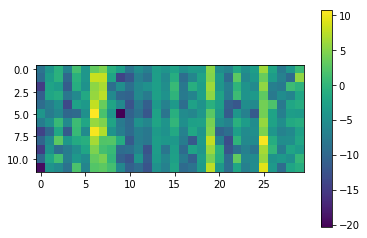

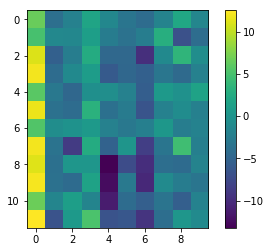

In [16]:
#Rotation invariance

_,label=testloader.dataset[0] 
label=label.item()
print(labels_anglais[label])

def show(vol):
    vol = vol.view(1,1,32,32,32)
    vol = vol.type(torch.cuda.FloatTensor)
    vol = net.conv(vol)
    vol = vol.view(vol.size(0), -1)
    feature1 = net.fc1(vol)
    feature2=net.dense(feature1)
    feature1=feature1.cpu()
    feature2=feature2.cpu()
    feature2=feature2.view(num_classes)
    feature1=feature1.view(128)
    return(feature1,feature2)

feat1=torch.zeros(12,30)
feat2=torch.zeros(12,10)
for i in range(12):
    vol,label=testloader.dataset[i]
    feature1,feature2=show(vol)
    for j in range(30):
        if j<10:
            feat2[i,j]=feature2[j].item()
        feat1[i,j]=feature1[j].item()

showTensor(feat1)
showTensor(feat2)

In [ ]:
#First convolution layer feature visualisation in 3D
class VoxNet_feat_conv1(torch.nn.Module):

    def __init__(self, num_classes, input_shape=(32, 32, 32)): 
        super(VoxNet_feat_conv1, self).__init__()
        self.conv1=torch.nn.Conv3d(1,32,5,2)
        self.conv = torch.nn.Sequential(torch.nn.LeakyReLU(),
                                       torch.nn.Dropout(p=0.2),
                                       torch.nn.Conv3d(32, 32, 3),
                                       torch.nn.LeakyReLU(),
                                       torch.nn.MaxPool3d(2),
                                       torch.nn.Dropout(p=0.3)
                                       
        )
        self.fc1=torch.nn.Linear(32* 6 * 6 * 6, 128)
        self.dense = torch.nn.Sequential(
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.4),
            torch.nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = x.view(x.size()[0],1,32,32,32)
        x = self.conv1(x)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dense(x)
        return x



In [ ]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
cuda=True
net1 = VoxNet_feat_conv1(num_classes=num_classes)
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print("using cuda")
    net.cuda()
learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)
Utilitaires.train(net, optimizer, trainloader, testloader, criterion,  n_epoch = 10,
      train_acc_period = 10,
      test_acc_period = 1000)
Utilitaires.accuracy(net,testloader)


In [ ]:
#First Convolution features.

vol,label=testloader.dataset[100] 
label=label.item()
print(labels_anglais[label])
vol = vol.view(1,1,32,32,32)
vol = vol.type(torch.cuda.FloatTensor)
vol = net1.conv1(vol).view(32,14,14,14)
for i in range(32):
    voli=vol[i]
    voli=voli.view(49,56)
    voli=voli.cpu()
    showTensor(voli)
    
